In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics

In [3]:
data_path = "D:/home/acgotaku/Downloads/new_data/"
csv = pd.read_csv(data_path+'train_set.csv')
csv.head()

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


C:\Users\Lenovo\Miniconda2\envs\untitled\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


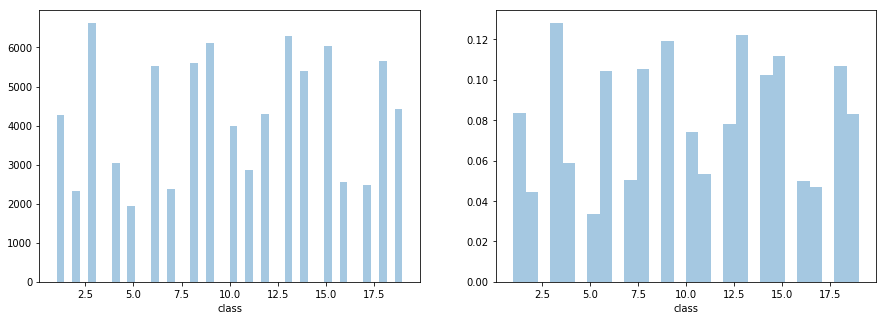

In [6]:
train, test = train_test_split(csv[['article','word_seg','class']], test_size= 0.2)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(train['class'], ax=ax[0], kde=0, norm_hist=0, label="classes in train set")
sns.distplot(test['class'], ax=ax[1], kde=0, norm_hist=1)
plt.show()

C:\Users\Lenovo\Miniconda2\envs\untitled\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


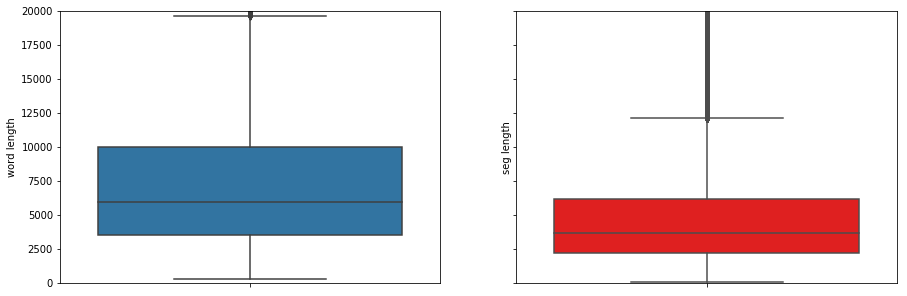

In [90]:
word_seg_len, word_len= [], []
for i in train.index:
    word_len.append(len(train.loc[i,'article']))
    word_seg_len.append(len(train.loc[i,'word_seg']))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey='all')
plt.ylim(0,20000)
show_data = pd.DataFrame(data = list(zip(word_len, word_seg_len)), columns=['word length','seg length'])
sns.boxplot(ax=ax[0], y='word length',data=show_data)
sns.boxplot(ax=ax[1],y='seg length',data=show_data, color='red')
fig.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
vect = TfidfVectorizer(ngram_range=(1,2), max_df=0.8, min_df= 5, smooth_idf=1, sublinear_tf=1)
train_num = vect.fit_transform(train['word_seg'])
val_num = vect.transform(val['word_seg'])

In [47]:
train_label = np.asarray(train['class'], dtype=int)
val_label = np.asarray(val['class'], dtype=int)

In [48]:
clf = svm.LinearSVC()
clf.fit(train_num, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
pred = clf.predict(val_num)
print("the acc is {}".format(metrics.accuracy_score(val_label, pred)))

the acc is 0.7849530700039108


In [53]:
pred = clf.predict(val_num)
print("this is calssification, \
    the pecision is {0},\
          the recall is {1} \
           the f1_score is {2}".format(metrics.precision_score(val_label, pred, average='micro'),\
                                        metrics.recall_score(val_label, pred,average='micro'),\
                                        metrics.f1_score(val_label, pred,average='micro' )))

this is calssification,     the pecision is 0.7849530700039108,          the recall is 0.7849530700039108            the f1_score is 0.7849530700039108


In [131]:
from sklearn.metrics import confusion_matrix
corrmat = confusion_matrix(val_label, pred)
#del correction
for i in range(19):
    corrmat[i][i] = 0
from sklearn.preprocessing import StandardScaler
corrmat = StandardScaler().fit_transform(corrmat)

C:\Users\Lenovo\Miniconda2\envs\untitled\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lenovo\Miniconda2\envs\untitled\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


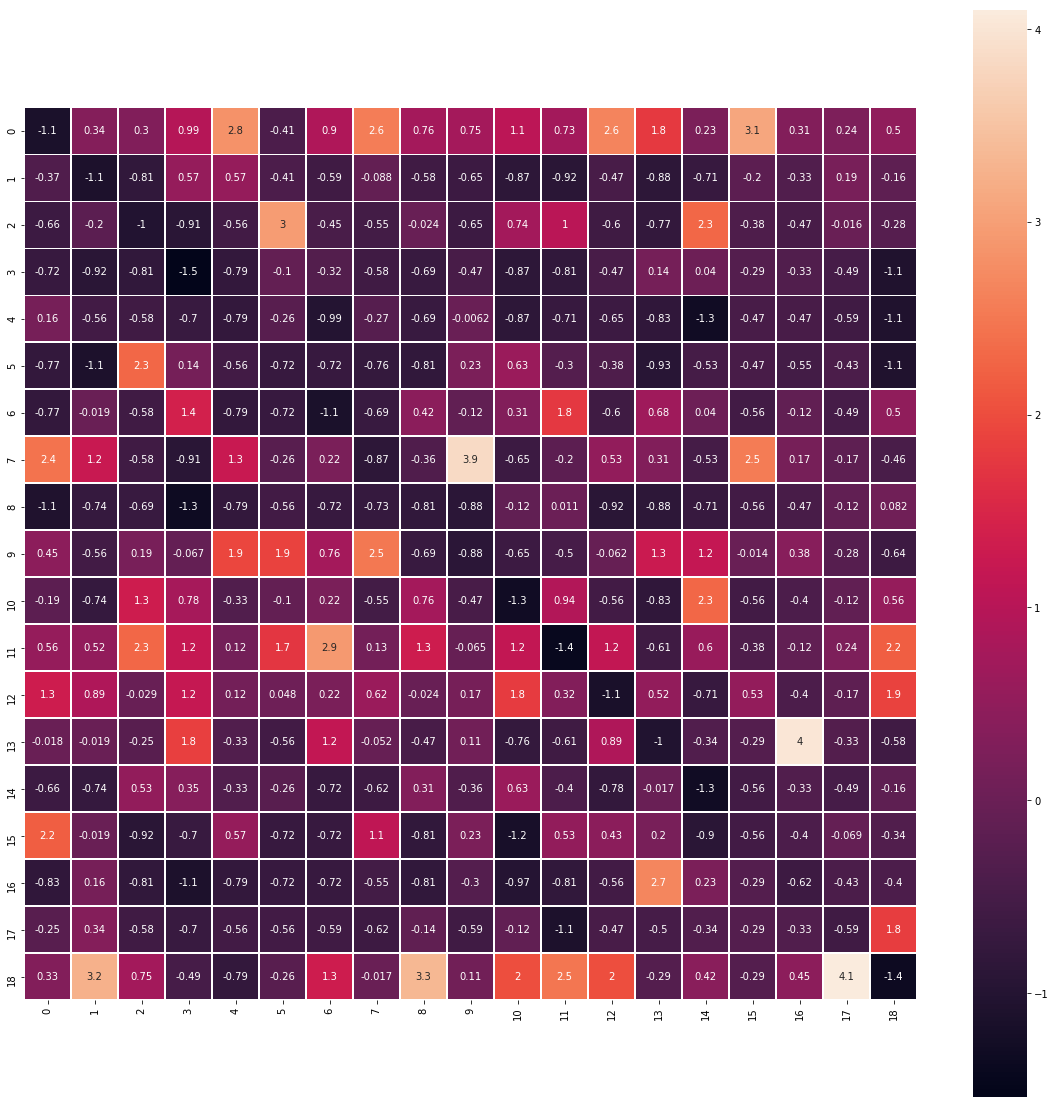

In [133]:
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.show()

C:\Users\Lenovo\Miniconda2\envs\untitled\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


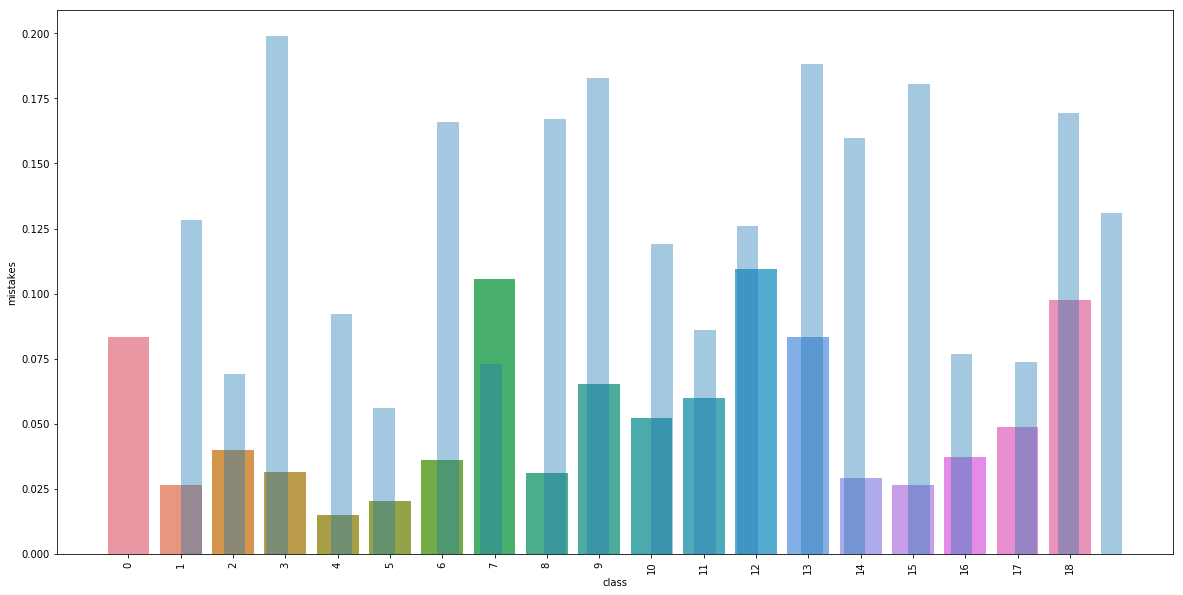

In [157]:
corrmat = confusion_matrix(val_label, pred)
#del correction
for i in range(19):
    corrmat[i][i] = 0
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation='90')
show_data = pd.DataFrame()
show_data['class'] = range(19)

all_mistake = sum(corrmat)
new_mis = []
for item in all_mistake:
    new_mis.append(item/sum(all_mistake))
show_data['mistakes'] = new_mis
sns.barplot(x ='class', y = 'mistakes', data = show_data)
sns.distplot(train['class'], kde=0, norm_hist=1)
plt.show()


In [119]:
sum(corrmat)

array([367,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int64)

In [56]:
test = pd.read_csv(data_path+'test_set.csv')['word_seg']

In [58]:
test_num = vect.transform(test)
wanted = clf.predict(test_num)

In [86]:
df_wanted = pd.DataFrame(wanted, columns=['class'])
df_wanted['id'] = range(len(wanted))

In [109]:
df_wanted[['id','class']].to_csv('./first.csv', index=False)